In [1]:
import pathlib
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *

plt.style.use('seaborn-whitegrid')    # 使用样式
plt.rcParams['font.sans-serif'] = ['SimHei']     # 显示中文
plt.rcParams['axes.unicode_minus'] = False     # 显示负号


path_record = pathlib.Path('./2022年读书记录.md')

## 数据准备

In [2]:
with open(path_record, encoding='utf-8') as f:
    content = f.read()


In [3]:
names = re.findall(r'### \[(.*?)\]\(', content)
links = re.findall(r'### .*?\((.*?)\)', content)
stars = [len(i) for i in re.findall(r'<font color.*?>(.*?)</font>', content)]

In [4]:
line1 = re.findall(r'\n> (.*?)\n>', content)
line2 = re.findall(r'\n> .*?\n> (.*?)\n', content)

# writers = [i.split(' / ')[0] for i in line1]
# publishers = [i.split(' / ')[1] for i in line1]
# publish_times = [i.split(' / ')[2] for i in line1]
# prices = [i.split(' / ')[3].replace('元', '') for i in line1]

read_dates = [i.split(' ')[0] for i in line2]
# labels = [re.search(r'标签: (.*)', i).group(1).split() for i in line2]
labels = ['' for i in line2]

In [5]:

df = pd.DataFrame({'书名': names, '评分': stars, '读完时间': read_dates, '标签': labels, '备注': line1, '豆瓣链接': links})
df['读完时间'] = pd.to_datetime(df['读完时间'])
df['月份'] = df['读完时间'].dt.month.astype(str) + '月'
df['月份'] = pd.Categorical(df['月份'], categories=['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月'])
df = df.sort_values('读完时间')
df['累计数量'] = 1
df['累计数量'] = df['累计数量'].cumsum()
df['书名'] = df['书名'].str.replace(': 日本小學館獨家授權香港中文版', '')
df

,书名,评分,读完时间,标签,备注,豆瓣链接,月份,累计数量
57,禅与摩托车维修艺术,3,2022-01-16,,罗伯特•M.波西格 (Robert M.Pirsig) / 张国辰 / 重庆出版社 / 20...,https://book.douban.com/subject/6811366/,1月,1
56,文章自在,4,2022-01-26,,张大春 / 广西师范大学出版社 / 2017-1 / 36.00元,https://book.douban.com/subject/26940987/,1月,2
55,晨间日记的奇迹,3,2022-01-29,,[日] 佐藤傳 / 赵明敏 / 南海出版公司 / 2009-5 / 25.00元,https://book.douban.com/subject/3744041/,1月,3
54,星之继承者 2 温柔的伽星巨人,4,2022-01-30,,[英] 詹姆斯·P.霍根 / [加] 仇春卉 / 新星出版社 / 2021-4 / 59.00 元,https://book.douban.com/subject/35314089/,1月,4
53,亂馬1/2（卷十五）,4,2022-02-01,,高橋留美子 / 玉郎图书文化传信有限公司 / HK$25,https://book.douban.com/subject/3894723/,2月,5
52,塞尔达传说 旷野之息 中文版完全攻略本,4,2022-02-02,,UCG / 2018-5 / 136元,https://book.douban.com/subject/35269682/,2月,6
51,七夜雪,3,2022-02-10,,沧月 / 北京十月文艺出版社 / 2006-10 / 25.00元,https://book.douban.com/subject/1919201/,2月,7
50,亂馬1/2（卷十六）,4,2022-02-20,,高橋留美子 / 玉郎图书文化传信有限公司 / HK$25,https://book.douban.com/subject/3911696/,2月,8
49,亂馬1/2（卷十七）,3,2022-02-20,,高橋留美子 / 玉郎图书文化传信有限公司 / HK$25,https://book.douban.com/subject/3911711/,2月,9
48,镜厅: 大萧条、大衰退，我们做对了什么，又做错了什么,3,2022-02-23,,[美] 巴里·埃森格林、Barry Eichengreen / 何帆 / 中信出版社 / 2...,https://book.douban.com/subject/26851886/,2月,10


In [6]:
df.columns

Index(['书名', '评分', '读完时间', '标签', '备注', '豆瓣链接', '月份', '累计数量'], dtype='object')

In [7]:
df['作者'] = df['备注'].map(lambda x: x.split(' / ')[0])
df['评分'] = df['评分'].map(lambda x: '★' * x)
df1 = df[['书名', '作者', '评分', '读完时间']]
df1

,书名,作者,评分,读完时间
57,禅与摩托车维修艺术,罗伯特•M.波西格 (Robert M.Pirsig),★★★,2022-01-16
56,文章自在,张大春,★★★★,2022-01-26
55,晨间日记的奇迹,[日] 佐藤傳,★★★,2022-01-29
54,星之继承者 2 温柔的伽星巨人,[英] 詹姆斯·P.霍根,★★★★,2022-01-30
53,亂馬1/2（卷十五）,高橋留美子,★★★★,2022-02-01
52,塞尔达传说 旷野之息 中文版完全攻略本,UCG,★★★★,2022-02-02
51,七夜雪,沧月,★★★,2022-02-10
50,亂馬1/2（卷十六）,高橋留美子,★★★★,2022-02-20
49,亂馬1/2（卷十七）,高橋留美子,★★★,2022-02-20
48,镜厅: 大萧条、大衰退，我们做对了什么，又做错了什么,[美] 巴里·埃森格林、Barry Eichengreen,★★★,2022-02-23


In [8]:
with pd.ExcelWriter("2022年读书小结.xlsx") as xlsx:
    df.to_excel(xlsx,sheet_name="小结1", index=False)
    df1.to_excel(xlsx,sheet_name="小结2", index=False)


## 配色

In [9]:
import plotly.express as px

px.colors.sequential.swatches()

In [10]:
px.colors.qualitative.swatches()

In [11]:
px.colors.qualitative.Set3

['rgb(141,211,199)',
 'rgb(255,255,179)',
 'rgb(190,186,218)',
 'rgb(251,128,114)',
 'rgb(128,177,211)',
 'rgb(253,180,98)',
 'rgb(179,222,105)',
 'rgb(252,205,229)',
 'rgb(217,217,217)',
 'rgb(188,128,189)',
 'rgb(204,235,197)',
 'rgb(255,237,111)']

In [12]:
sns.color_palette("Set3", 12)

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [13]:
px.colors.sequential.matter

['rgb(253, 237, 176)',
 'rgb(250, 205, 145)',
 'rgb(246, 173, 119)',
 'rgb(240, 142, 98)',
 'rgb(231, 109, 84)',
 'rgb(216, 80, 83)',
 'rgb(195, 56, 90)',
 'rgb(168, 40, 96)',
 'rgb(138, 29, 99)',
 'rgb(107, 24, 93)',
 'rgb(76, 21, 80)',
 'rgb(47, 15, 61)']

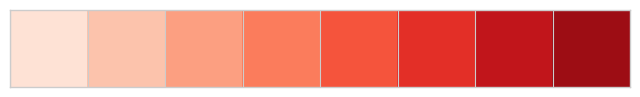

In [14]:
sns.palplot(sns.color_palette("Reds", 8))

## 可视化

In [15]:
df = pd.read_excel("2022年读书小结.xlsx")
df

,书名,评分,读完时间,标签,备注,豆瓣链接,月份,累计数量,作者
0,禅与摩托车维修艺术,★★★,2022-01-16,NaN,罗伯特•M.波西格 (Robert M.Pirsig) / 张国辰 / 重庆出版社 / 20...,https://book.douban.com/subject/6811366/,1月,1,罗伯特•M.波西格 (Robert M.Pirsig)
1,文章自在,★★★★,2022-01-26,NaN,张大春 / 广西师范大学出版社 / 2017-1 / 36.00元,https://book.douban.com/subject/26940987/,1月,2,张大春
2,晨间日记的奇迹,★★★,2022-01-29,NaN,[日] 佐藤傳 / 赵明敏 / 南海出版公司 / 2009-5 / 25.00元,https://book.douban.com/subject/3744041/,1月,3,[日] 佐藤傳
3,星之继承者 2 温柔的伽星巨人,★★★★,2022-01-30,NaN,[英] 詹姆斯·P.霍根 / [加] 仇春卉 / 新星出版社 / 2021-4 / 59.00 元,https://book.douban.com/subject/35314089/,1月,4,[英] 詹姆斯·P.霍根
4,亂馬1/2（卷十五）,★★★★,2022-02-01,NaN,高橋留美子 / 玉郎图书文化传信有限公司 / HK$25,https://book.douban.com/subject/3894723/,2月,5,高橋留美子
5,塞尔达传说 旷野之息 中文版完全攻略本,★★★★,2022-02-02,NaN,UCG / 2018-5 / 136元,https://book.douban.com/subject/35269682/,2月,6,UCG
6,七夜雪,★★★,2022-02-10,NaN,沧月 / 北京十月文艺出版社 / 2006-10 / 25.00元,https://book.douban.com/subject/1919201/,2月,7,沧月
7,亂馬1/2（卷十六）,★★★★,2022-02-20,NaN,高橋留美子 / 玉郎图书文化传信有限公司 / HK$25,https://book.douban.com/subject/3911696/,2月,8,高橋留美子
8,亂馬1/2（卷十七）,★★★,2022-02-20,NaN,高橋留美子 / 玉郎图书文化传信有限公司 / HK$25,https://book.douban.com/subject/3911711/,2月,9,高橋留美子
9,镜厅: 大萧条、大衰退，我们做对了什么，又做错了什么,★★★,2022-02-23,NaN,[美] 巴里·埃森格林、Barry Eichengreen / 何帆 / 中信出版社 / 2...,https://book.douban.com/subject/26851886/,2月,10,[美] 巴里·埃森格林、Barry Eichengreen


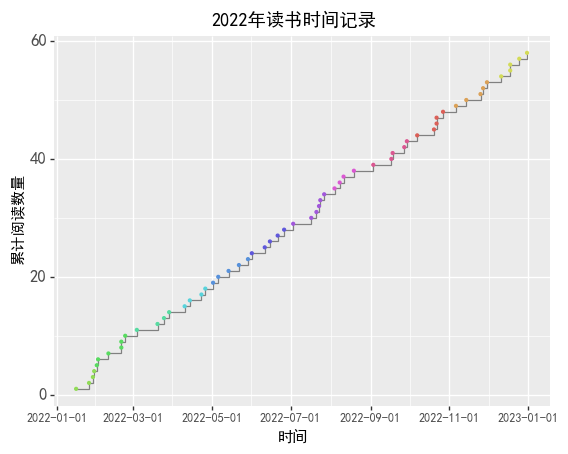

<ggplot: (108169478361)>

In [16]:
(ggplot(df, aes(x='读完时间', y='累计数量'))
    # + geom_line()
    + geom_step(color='grey')
    + geom_point(aes(color='月份'), size=.7)
    + labs(x='时间', y='累计阅读数量', title='2022年读书时间记录')
    + guides(color=False)
    + theme(text=element_text(family="SimHei"),
            # axis_text_x=element_text(size=12),
            axis_text_y=element_text(size=12),
            )
)

In [17]:
sns.color_palette("Set3", 12).as_hex()

['#8dd3c7',
 '#ffffb3',
 '#bebada',
 '#fb8072',
 '#80b1d3',
 '#fdb462',
 '#b3de69',
 '#fccde5',
 '#d9d9d9',
 '#bc80bd',
 '#ccebc5',
 '#ffed6f']

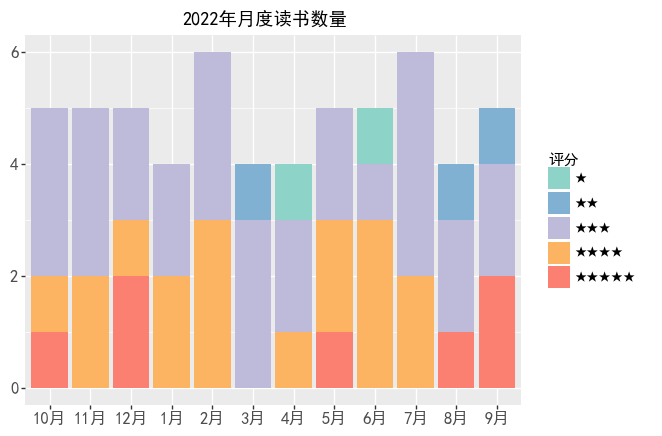

<ggplot: (108169653221)>

In [18]:
# colors = sns.color_palette("Reds").as_hex()
colors = [sns.color_palette("Set3", 12).as_hex()[i] for i in [0, 4, 2, 5, 3]]

(ggplot(df, aes(x='月份'))
    # + geom_bar(fill='lightblue')
    + geom_bar(aes(fill='factor(评分)', group='factor(评分)'))
    + scale_fill_manual(values=colors)
    + labs(x='', y='', title='2022年月度读书数量', fill='评分')
    + theme(text=element_text(family="SimHei"),
            axis_text_x=element_text(size=12),
            axis_text_y=element_text(size=12),
            )
)


In [19]:
df_score = df.groupby('评分', as_index=False).count()[['评分', '书名']]
df_score['评分'] = df_score['评分'].map(len).astype(str) + '分'
df_score['评分'] = pd.Categorical(df_score['评分'], categories=reversed(['1分', '2分', '3分', '4分', '5分']))
df_score['x'] = 1
df_score

,评分,书名,x
0,1分,2,1
1,2分,3,1
2,3分,29,1
3,4分,17,1
4,5分,7,1


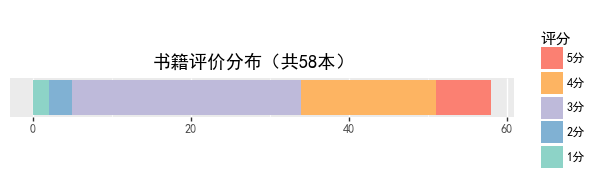

<ggplot: (108169618670)>

In [20]:
# colors_r = sns.color_palette("Reds_r").as_hex()
colors_r = list(reversed(colors))

(ggplot(df_score)
    + geom_col(aes(x='x', y='书名', fill='评分'))
    # + geom_text(aes(label='书名'), )
    + scale_fill_manual(values=colors_r)
    + labs(x='', y='', title=f'书籍评价分布（共{df_score["书名"].sum()}本）')
    + scale_x_continuous(breaks=None)
    # + guides(fill = guide_legend(reverse=True))
    + theme(text=element_text(family="SimHei"),
            figure_size=(6.5, 0.5),
            # axis_ticks=element_blank(),
            )
    + coord_flip()
)

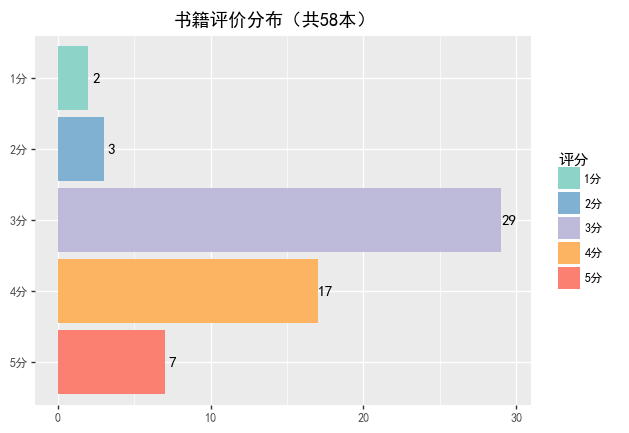

<ggplot: (108170361926)>

In [31]:
(ggplot(df_score, aes(x='评分', y='书名', fill='评分'))
    + geom_col()
    + geom_text(aes(label='书名', y='书名+.5'))
    + scale_fill_manual(values=colors_r)
    + labs(x='', y='', title=f'书籍评价分布（共{df_score["书名"].sum()}本）')
    # + scale_x_continuous(breaks=None)
    + guides(fill = guide_legend(reverse=True))
    + theme(text=element_text(family="SimHei"),
            # figure_size=(6.5, 0.5),
            # axis_ticks=element_blank(),
            )
    + coord_flip()
)

<AxesSubplot:ylabel='书名'>

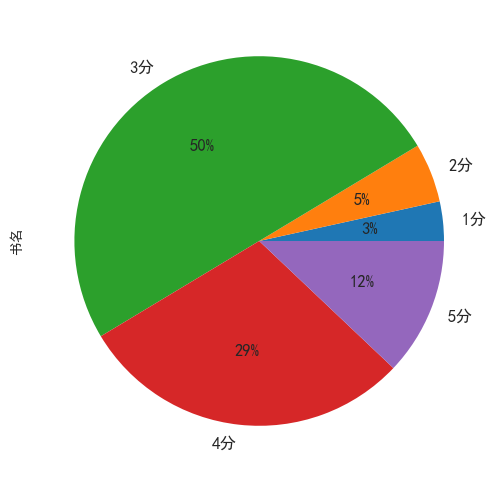

In [21]:
df_score.set_index('评分').plot.pie(y='书名', figsize=(6, 6), autopct='%1.0f%%', fontsize=12, legend=False)

In [42]:
df_output = pd.DataFrame({'短评': 58, '长评': 33}, index=[0]).melt()
df_output.columns=['评论', '数量']
df_output

,评论,数量
0,短评,58
1,长评,33


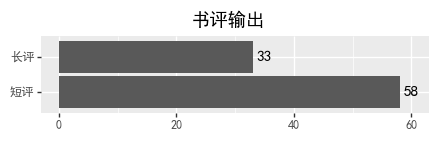

<ggplot: (108171995736)>

In [51]:
(ggplot(df_output, aes(x='评论', y='数量'))
    + geom_col()
    + geom_text(aes(label='数量', y='数量+2'))
    + labs(x='', y='', title=f'书评输出')
    + theme(text=element_text(family="SimHei"),
            figure_size=(5, 1),
            )
    + coord_flip()
)

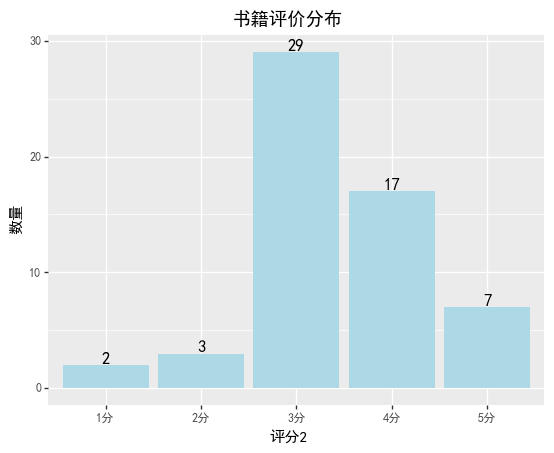

<ggplot: (106227880533)>

In [ ]:
df_score['评分2'] = pd.Categorical(df_score['评分'], categories=['1分', '2分', '3分', '4分', '5分'])

(ggplot(df_score, aes(x='评分2', y='书名'))
    + geom_col(fill='lightblue')
    + geom_text(aes(label='书名'), size=12, va='bottom')
    + ggtitle('书籍评价分布')
    + ylab('数量')
    + theme(text=element_text(family="SimHei"))
)

In [ ]:
df.query('评分==5')['书名']

Series([], Name: 书名, dtype: object)

## 书本封面缩略图集合

In [ ]:
import re
from PIL import Image, ImageDraw, ImageFont


folder = pathlib.Path("D:\Python_Work\Web Spider\my_douban_books\my_douban_data")
records = folder / "2022年读书记录.md"
sort_flag = True    # 是否按评价排序

# 获取图片和评级信息
with open(records, encoding='utf-8') as f:
    content = f.read()
    
img_links = [folder / i for i in re.findall("!\[\]\((.*?)\)", content)]
stars = re.findall(r'>(.*?)</font>', content)

if sort_flag:
    combined = sorted(zip(img_links, stars), key=lambda x: len(x[1]), reverse=True)
    img_links = [i[0] for i in combined]
    stars = [i[1] for i in combined]


In [ ]:
def combine_pics(img_links, width, height, col_num, pic_path):
    """拼接图片缩略图"""
    imgs = [Image.open(i).resize((width, height)) for i in img_links]
    big_pic = Image.new('RGBA', (width * col_num, height * (len(imgs) // col_num + 1)), 'white')

    for num, img in enumerate(imgs):
        x = num % col_num * width
        y = num // col_num * height
        big_pic.paste(img, (x, y))
        
    # big_pic.show()   
    # plt.imshow(big_pic)  
    # plt.show()
    big_pic.save(pic_path)
    
    
def add_stars(stars, width, height, col_num, pic_path, font_path):
    """添加书本评价星标"""
    big_pic = Image.open(pic_path)
    draw = ImageDraw.Draw(big_pic)
    font = ImageFont.truetype(font_path, 32)

    for num, star in enumerate(stars):
        x = num % col_num * width
        y = num // col_num * height
        # draw.rectangle((x, y+col_num, x+width, int(y+40)), fill=(23, 103, 224, 255))
        draw.rectangle((x, y+col_num, x+width, int(y+40)), fill=(226, 221, 70, 255))
        # draw.text((x, y), star, fill='darkred', font=font)
        draw.text((x, y), star, fill=(204, 48, 67, 255), font=font)

    # big_pic.show()   
    # plt.imshow(big_pic)  
    # plt.show()
    big_pic.save(pic_path)
    
    
width, height = 270, 400    # 单幅小图尺寸
col_num = 10    # 每行包含的图片数
pic_path = "书籍封面图集合.png"     # 拼接图保存路径
font_path = r'D:\Python_Work\maze_generator&solver\fonts\msyh.ttf'

combine_pics(img_links, width, height, col_num, pic_path)
add_stars(stars, width, height, col_num, pic_path, font_path)

In [ ]:
top = 7
img_links_top = img_links[:top]
pic_path = "五星书籍封面图集合.png"     # 拼接图保存路径
col_num = 4    # 每行包含的图片数
combine_pics(img_links_top, width, height, col_num, pic_path)